# **LVPM Data Analysis**
- Author: Kim Dohwan [@ehghks021203](https://github.com/ehghks021203)
- Date: 2023.09.10. ~
- Description: Land value prediction model with XGBoost.
------

## **1. Load libraries & get data**
### **1-1. Load libraries**
시각화를 위한 matplotlib, seaborn, 데이터 분석을 위한 scipy 등을 임포트 합니다.

In [19]:
import os
import sys
sys.path.append(os.path.dirname(os.path.abspath('')))

from config import BASE_DIR

# progress bar
from tqdm import trange, notebook

# linear algebra
import numpy as np 

# data processing
import pandas as pd
pd.options.display.float_format = "{: .2f}".format

# data visualization
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
sns.set(style="white", context="notebook", palette="deep")

# preprocessing
from sklearn.model_selection import train_test_split

# data analysis
from scipy.stats import kstest
from scipy.stats import skew, norm

# model
import xgboost as xgb

# model visualization
from xgboost import plot_importance
from pdpbox import info_plots

# model validation
from sklearn.metrics import mean_squared_error

### **1-2. Load dataset**

In [2]:
# Load Train Dataset
# DATA_PATH = BASE_DIR + "/Data/DatasetWithoutCdData.csv"
DATA_PATH = BASE_DIR + "/Data/Dataset.csv"
df = pd.read_csv(DATA_PATH)

## **Data cleaning**

In [3]:
# PNU 코드 자료형을 문자열로 변경
df["PNU"] = df["PNU"].astype("str")

# PNU 코드 중 시/도 추출
df.insert(loc=1,column="Sido",value=df["PNU"].str.slice(0, 2).astype("object"))
df.insert(loc=2,column="LdCode",value=df["PNU"].str.slice(0, 10).astype("object"))

# PNU 코드, 법정동 코드, 거래 면적 feature 제거
df.drop(["PNU", "LdCode", "DealArea"], axis=1, inplace=True)

## **Data analysis**

데이터 분석을 진행합니다.

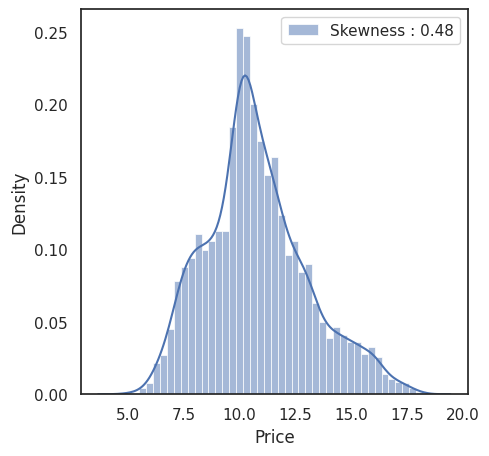

In [4]:
# target frature에 대한 분석
plt.subplots(figsize=(5, 5))
g = sns.histplot(
    np.log1p(df["Price"]),   # 가격 편차가 크기 때문에 log scaling을 해줌
    kde=True,
    stat="density",
    kde_kws=dict(cut=3),
    label = "Skewness : %.2f"%(np.log1p(df["Price"]).skew())
)
g = g.legend(loc="best")

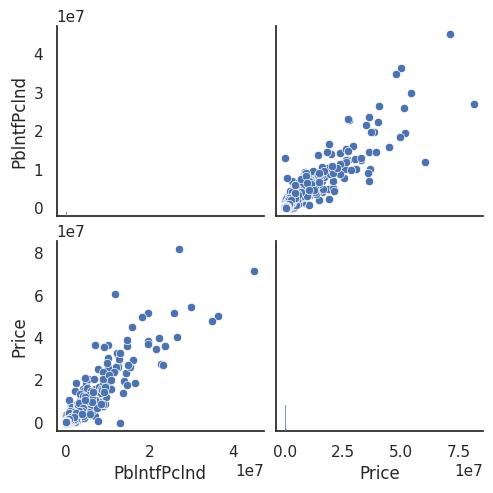

In [10]:
sns.pairplot(df, vars=["PblntfPclnd", "Price"])
plt.show()

<Axes: ylabel='Price'>

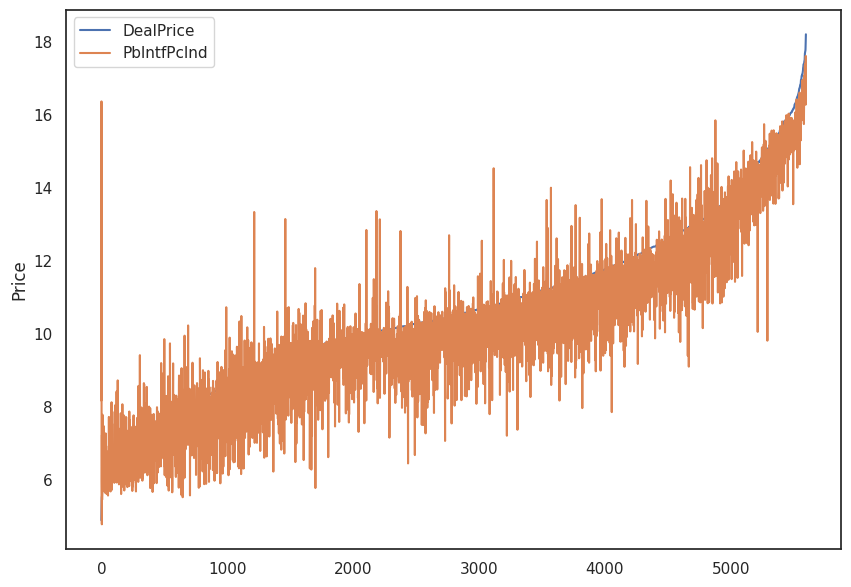

In [5]:
df_price = df[["Price", "PblntfPclnd"]]
df_price = df_price.sort_values("Price").reset_index(drop=True)

plt.subplots(figsize=(10, 7))
sns.lineplot(np.log1p(df_price["Price"]), label="DealPrice")
sns.lineplot(np.log1p(df_price["PblntfPclnd"]), label="PblntfPclnd")

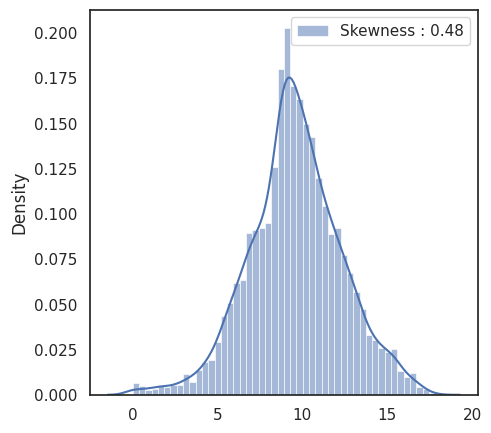

In [18]:
# target frature에 대한 분석
plt.subplots(figsize=(5, 5))
g = sns.histplot(
    np.log1p(abs(df["Price"] - df["PblntfPclnd"])),   # 가격 편차가 크기 때문에 log scaling을 해줌
    kde=True,
    stat="density",
    kde_kws=dict(cut=3),
    label = "Skewness : %.2f"%(np.log1p(df["Price"]).skew())
)
g = g.legend(loc="best")

<Axes: xlabel='difference'>

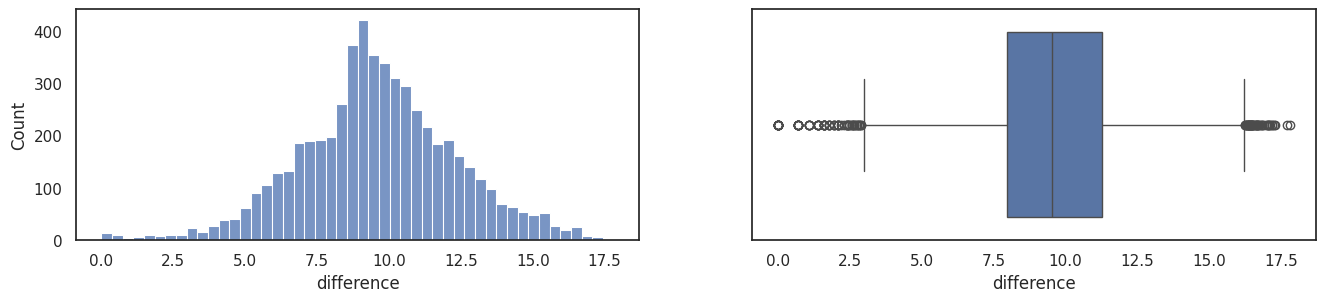

In [12]:
df["difference"] = np.log1p(abs(df["Price"] - df["PblntfPclnd"]))

fig, axes = plt.subplots(1, 2, figsize=(16, 3))

sns.histplot(x=df["difference"], ax=axes[0])
sns.boxplot(x=df["difference"], ax=axes[1])